## Create a new Index

In [13]:
from Offline.Helper.timing import Timing
from Offline.Helper.ORM import fetch_records
from Offline.Pipeline.index.index import Index

with Timing('Creating Index...'):
    records = fetch_records(model="Corpus")
    documents = [rec.text for rec in records]
    index = Index(records)
    index.save(model_name="Pipeline/index/Saved/wiki_model.pickle",
               tfidf_name="Pipeline/index/Saved/wiki_tfidf.pickle",
               keys_name="Pipeline/index/Saved/wiki_keys.pickle")

## Load existing Index

In [20]:
from Offline.Pipeline.index.index import Index

index1 = Index.load(model_name="Offline/Pipeline/index/Saved/antique/processed_corpus/model403666.pickle",
                   tfidf_name="Offline/Pipeline/index/Saved/antique/processed_corpus/tfidf403666.pickle",
                   keys_name="Offline/Pipeline/index/Saved/antique/processed_corpus/keys403666.pickle")

index2 = Index.load(model_name="Offline/Pipeline/index/Saved/wiki/processed_corpus/model369721.pickle",
                   tfidf_name="Offline/Pipeline/index/Saved/wiki/processed_corpus/tfidf369721.pickle",
                   keys_name="Offline/Pipeline/index/Saved/wiki/processed_corpus/keys369721.pickle")

# Evaluate the currently loaded index

In [21]:
from Offline.Pipeline.Evaluation.eval import evaluate
from Offline.Helper.timing import Timing


with Timing('Evaluating Documents...'):
    ev1 = evaluate(
                  index1,
                  rel=3,
                  qrels_path="Offline/Pipeline/Evaluation/Antique/qrels_antique",
                  queries_path="Offline/Pipeline/Evaluation/Antique/queries.csv",
                  run_path="Offline/Pipeline/Evaluation/Antique/run_antique_processed",
                  create_run_file_bool=False,
                  # metrics_path="Offline/Pipeline/Evaluation/Antique/antique_processed_metrics"
    )

    ev2 = evaluate(
                  index2,
                  rel=1,
                  qrels_path="Offline/Pipeline/Evaluation/Wiki/qrels_wiki",
                  queries_path="Offline/Pipeline/Evaluation/Wiki/queries.csv",
                  run_path="Offline/Pipeline/Evaluation/Wiki/run_wiki_processed_corpus",
                  create_run_file_bool=False,
                  # metrics_path="Offline/Pipeline/Evaluation/Antique/antique_processed_metrics"
    )

    ev1.update((x, y * 100) for x, y in ev1.items())
    ev2.update((x, y * 100) for x, y in ev2.items())

print(ev1)
print(ev2)

Evaluating Documents... elapsed time: 3.9014205932617188
{AP(rel=3): 7.361510823088743, RR(rel=3): 22.749247547727165, R@10: 10.638176985767522, P@10: 9.0065952184665}
{RR: 58.563078999574294, R@10: 16.76518955367677, AP: 14.2412262541603, P@10: 18.372576177285165}


# Search for a certain term

In [22]:
from Offline.Helper.timing import Timing

with Timing('searching...'):
  top_documents = index1.search('yanni', 0.3)
  for doc_id, score, idx in top_documents:
      print(f"Document {doc_id}: Similarity Score {score}")

Document 2548062_2: Similarity Score 1.0
searching... elapsed time: 5.347031116485596


## Export all the featrures to a file

In [14]:
feature_names = index1.vectorizer.get_feature_names_out()
  
with open('Offline/feature_names/trying.txt', 'w') as f:
  # Write each feature name to a separate line in the file
  for feature_name in feature_names:
    f.write(feature_name + '\n')

## Clustering

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


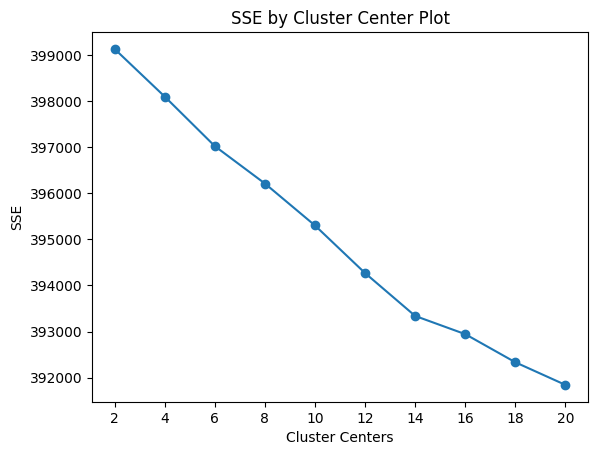

In [18]:
from Offline.Clustering import cluster_index, find_optimal_clusters


# find_optimal_clusters(index1.tfidf_matrix, 20)
find_optimal_clusters(index2.tfidf_matrix, 20)

# cluster_index(index1, n_clusters=2, init_size=400000, batch_size=800000,  random_state=20)
# cluster_index(index2, n_clusters=2, init_size=400000, batch_size=800000,  random_state=20)
